# Corpus Inspection - Descriptive Stats

## Imports

In [26]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Preparing Dataset - Full Corpus

In [27]:
df = pd.read_csv('../results/tfidf.csv').drop('Unnamed: 0', axis= 1)
df.head(5)

,Filename,Top 10 TF-IDF Words
0,fran_q1_2011.txt,"[('border', 0.33789811555387134), ('frontex', ..."
1,afic_2017.txt,"[('firearm', 0.49872260974129107), ('weapon', ..."
2,2023.11.16_frontex-general-industry-days-innov...,"[('industry', 0.36217134658434197), ('innovati..."
3,ara-2022-public-web.txt,"[('afic', 0.5450466305625354), ('migrant', 0.1..."
4,afic_2016.txt,"[('afic', 0.4951977970733415), ('niger', 0.257..."


### Add Publication Year Column

In [28]:
## Meta data such as year of publication or region will be added based on title
df['Year'] = df['Filename'].str.extract('(\d{4})')
print(df.to_string())

                                                                                          Filename                                                                                                                                                                                                                                                                                                                                            Top 10 TF-IDF Words  Year
0                                                                                 fran_q1_2011.txt                            [('border', 0.33789811555387134), ('frontex', 0.18052091104932852), ('country', 0.17757551551949838), ('eu', 0.17407073560792935), ('migrant', 0.1607492961672603), ('route', 0.1452414424509866), ('state', 0.14153311929753767), ('risk', 0.13785467652171585), ('return', 0.13618087101936838), ('member', 0.12855925002859672)]  2011
1                                                                                    afi

In [29]:
# some filenames do not include a year, since it is only few, these will be looked up manually
with pd.option_context('display.max_colwidth', None): 
    print(df.loc[df['Year'].isna(), 'Filename'])

19                  situational_overview_on_trafficking_in_human_beings.txt
85    common-integrated-risk-analysis-model-version-summary-booklet-2.1.txt
90                            unaccompanied_minors_in_migration_process.txt
Name: Filename, dtype: object


In [30]:
# Assign a new Year values
df.loc[df['Filename'] == 'situational_overview_on_trafficking_in_human_beings.txt', 'Year'] = 2011  
df.loc[df['Filename'] == 'common-integrated-risk-analysis-model-version-summary-booklet-2.1.txt', 'Year'] = 2021  
df.loc[df['Filename'] == 'unaccompanied_minors_in_migration_process.txt', 'Year'] = 2010  
# convert Year column to integer type
df['Year'] = pd.to_numeric(df['Year'])

In [31]:
#check if numbers make sense
print(min(df['Year']), max(df['Year']))

20 2023


In [32]:
df.loc[df['Year'] == 20, 'Filename']

69    0020.5032_en_16.txt
Name: Filename, dtype: object

In [33]:
#it seems the year should in fact be 2016
df.loc[df['Filename'] == '0020.5032_en_16.txt', 'Year'] = 2016  
#check if numbers make sense now
print(min(df['Year']), max(df['Year']))

2010 2023


### Add Region Column

In [34]:
# Define a dictionary mapping parts-of-filename to region values
conditions_to_region = {
    'fran_': 'Global',
    'risk_analysis' : 'Global',
    'eap-': 'Eastern Partnerships',
    'afic_': 'Africa',
    'wb_': 'Western Balkans',
    'eb_': 'Eastern European Borders'   
}

In [35]:
#apply mapping to create new Region column
df['Region'] = df['Filename'].apply(
    lambda filename: next((region for condition, region in conditions_to_region.items() if condition in filename), 'Other')
)
print(df.to_string())

                                                                                          Filename                                                                                                                                                                                                                                                                                                                                            Top 10 TF-IDF Words  Year                    Region
0                                                                                 fran_q1_2011.txt                            [('border', 0.33789811555387134), ('frontex', 0.18052091104932852), ('country', 0.17757551551949838), ('eu', 0.17407073560792935), ('migrant', 0.1607492961672603), ('route', 0.1452414424509866), ('state', 0.14153311929753767), ('risk', 0.13785467652171585), ('return', 0.13618087101936838), ('member', 0.12855925002859672)]  2011                    Global
1                                   

In [36]:
df.to_csv('../results/tfidf_enriched.csv')

## Preparing Dataset - Annual Reports Only

In [37]:
data = pd.read_csv('../results/tfidf_annual.csv').drop('Unnamed: 0', axis= 1)
data.head(5)

,Filename,Top 10 TF-IDF Words
0,risk_analysis_for_2019ws.txt,"[('border', 0.39473886542796993), ('eu', 0.324..."
1,annual_risk_analysis_2017ws.txt,"[('cid', 1.0), ('aa', 0.0), ('aah', 0.0), ('aa..."
2,risk_analysis_for_2018ws.txt,"[('border', 0.49468135934367247), ('eu', 0.220..."
3,risk_analysis_2021-2.txt,"[('border', 0.4177824504173335), ('eu', 0.2124..."
4,strategic-risk-analysis-2020.txt,"[('border', 0.44742859309767163), ('eu', 0.236..."


In [38]:
## Meta data such as year of publication or region will be added based on title
data['Year'] = data['Filename'].str.extract('(\d{4})')
# some filenames do not include a year, since it is only few, these will be looked up manually
with pd.option_context('display.max_colwidth', None): 
    print(df.loc[df['Year'].isna(), 'Filename'])

Series([], Name: Filename, dtype: object)


In [39]:
#change data type of year to int with no decimal places
data['Year'] = data['Year'].astype(int)
#check if numbers make sense
print(min(data['Year']), max(data['Year']))

2010 2022


In [40]:
data.to_csv('../results/tfidf_enriched_annual.csv')

## Visualizations

### Set Parameters for Seaborn

In [41]:
# efault figure size
sns.set(rc={'figure.figsize': (15, 5)})

#color palette
#sns.set_palette('Paired')
sns.color_palette('magma', as_cmap=True)

#other
sns.set_context('paper')
sns.set_style('ticks') 
sns.axes_style('ticks')

# Display settings
plt.rcParams.update({'axes.labelsize': 'large', 'axes.titlesize': 'large'})

### Number of Reports Published

In [42]:
#group df by Year and count publications
year_counts = df.groupby('Year')['Filename'].count().reset_index()
year_counts.columns = ['Year', 'Publications']

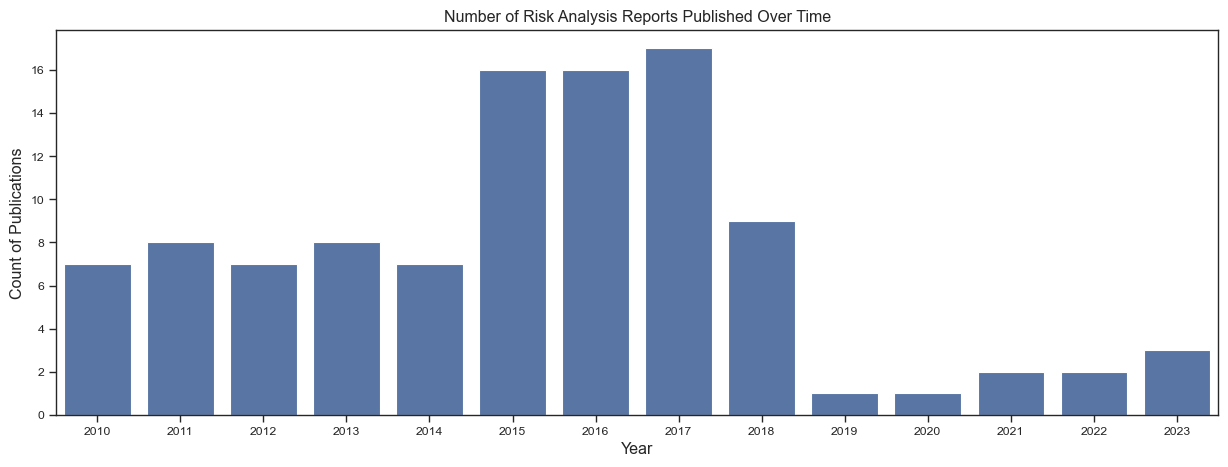

In [43]:
#plot count only
sns.barplot(x='Year', y='Publications', data=year_counts, errorbar=None)
plt.xlabel('Year')
plt.ylabel('Count of Publications')
plt.title('Number of Risk Analysis Reports Published Over Time')
#save plot
plt.savefig('../results/number_of_reports_over_time.png')
plt.show()

### Number of Reports Published by Region

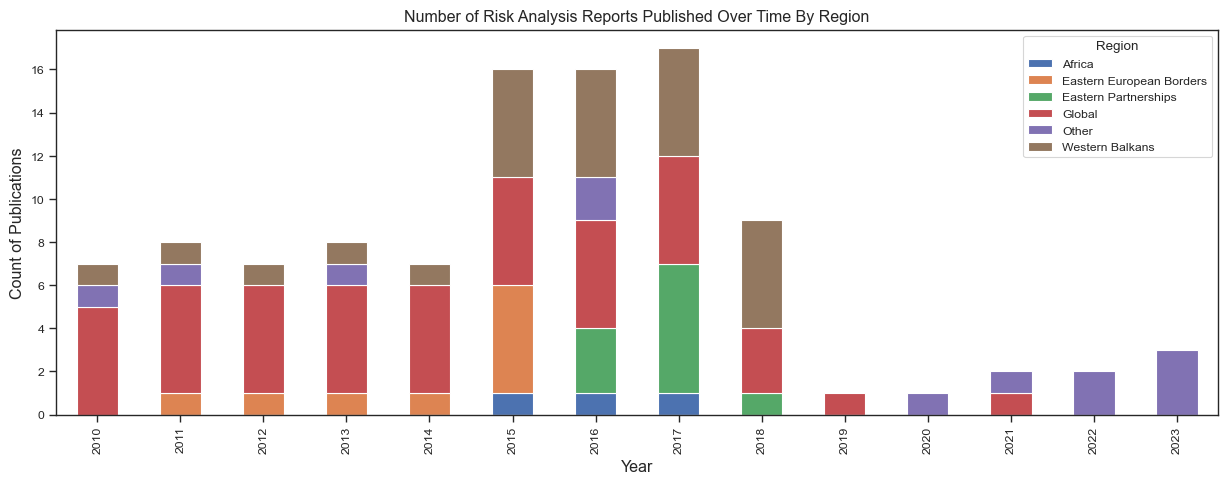

In [44]:
#group df by Year and Region and count publications
year_region_counts = df.groupby(['Year', 'Region']).size().unstack(fill_value=0)
year_region_counts.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Count of Publications')
plt.title('Number of Risk Analysis Reports Published Over Time By Region')
#save plot
plt.savefig('../results/number_of_reports_by_region.png')
plt.show()